In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
dataset = pd.read_csv(r"sample_clean.csv")

In [37]:
df=dataset.copy()

In [38]:
dataset.shape

(1689504, 48)

In [39]:
dataset.head()

,lei,derived_msa_md,state_code,county_code,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,applicant_age_above_62,submission_of_application,aus_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,0,14260,0,0,0,0,0,0,0,1,...,0,1,1,4030,33.90,69600,68,1083,1528,43
1,1,12580,1,1,1,0,1,0,1,1,...,1,2,1,8694,42.90,94900,94,2443,3199,19
2,2,19740,2,2,0,0,1,1,0,1,...,0,1,1,4406,20.13,89900,134,1358,1815,68
3,0,19660,3,3,0,0,1,0,0,1,...,1,1,2,3853,6.67,55700,106,1241,1649,30
4,3,35614,4,4,2,0,1,0,0,1,...,0,1,6,6197,13.80,78000,183,1817,1871,48


### UnderSampling 

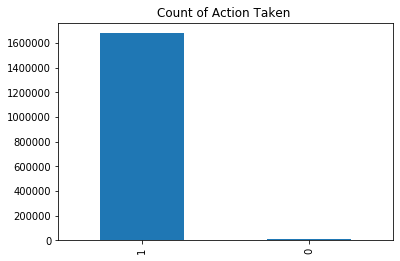

In [40]:
df.action_taken.value_counts().plot(kind='bar', title='Count of Action Taken ')

In [41]:
loan = len(df[df['action_taken'] == 0])
no_loan =  df[df.action_taken == 1].index

In [42]:
random_indices = np.random.choice(no_loan,loan, replace=False)
loan_in = df[df.action_taken == 0].index

In [43]:
under_sample_indices = np.concatenate([loan_in,random_indices])
under_sample = df.loc[under_sample_indices]

In [44]:
under_sample.shape

(22674, 48)

In [45]:
X = under_sample.drop('action_taken',axis=1)
Y = under_sample['action_taken']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) 

In [46]:
X_train.columns

Index(['lei', 'derived_msa_md', 'state_code', 'county_code',
       'derived_loan_product_type', 'derived_dwelling_category',
       'derived_ethnicity', 'derived_race', 'derived_sex', 'purchaser_type',
       'preapproval', 'loan_type', 'loan_purpose', 'lien_status',
       'reverse_mortgage', 'open_end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'property_value', 'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co_applicant_credit_score_type', 'applicant_ethnicity_1',
       'co_applicant_ethnicity_1', 'applicant_race_1', 'co_applicant_race_1',
       'applicant_sex', 'co_applicant_sex', 'applicant_age',
       'applicant_age_above_62', 'submission_of_application', 'aus_1',
       'tract_population', 'tract_minority_population_p

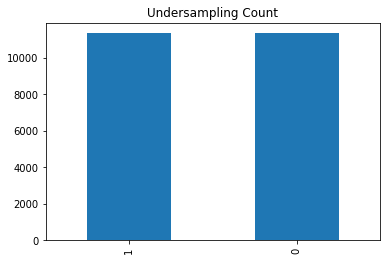

In [47]:
under_sample.action_taken.value_counts().plot(kind='bar', title='Undersampling Count');

In [48]:
under_sample.head()

,lei,derived_msa_md,state_code,county_code,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,applicant_age_above_62,submission_of_application,aus_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
46,39,99999,23,42,0,1,1,0,2,0,...,0,1111,1111,2398,20.39,54700,120,400,716,42
787,376,31084,9,18,0,1,1,3,1,0,...,0,1111,1111,3852,67.99,69300,136,1318,1538,46
797,380,23104,5,321,0,0,0,0,0,0,...,0,1111,1111,5143,15.79,75000,107,1554,1908,25
949,437,35614,4,246,0,0,1,0,0,0,...,0,1111,1111,1157,2.85,78000,140,647,3880,56
1805,660,99999,35,286,2,0,1,0,2,0,...,0,1111,1111,3698,18.88,69500,98,1081,1396,62


In [49]:
under_sample['action_taken'].value_counts()

1    11337
0    11337
Name: action_taken, dtype: int64

In [50]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

### Random Forest 

In [51]:
rand_class_smote = RandomForestClassifier(n_estimators = 8,random_state=2)
rand_class_smote.fit(x_train, Y_train)
y_pred_smote = rand_class_smote.predict(X_test)
y_pred_train_smote = rand_class_smote.predict(x_train)

Text(0.5, 1.0, 'Features importance')

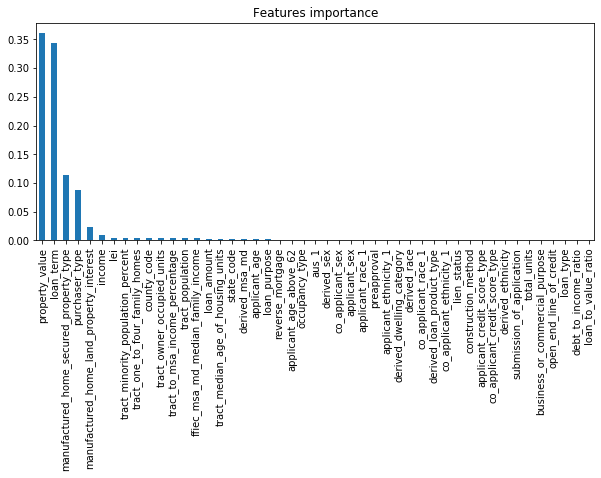

In [54]:
fet_ind = np.argsort(rand_class_smote.feature_importances_)[::-1]
fet_imp = rand_class_smote.feature_importances_[fet_ind]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
labels = X_train.columns[fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')


### Lasso Regression

In [57]:
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(x_train, Y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(x_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
